In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
from sklearn import preprocessing
warnings.filterwarnings('ignore')

df = pd.read_csv('./visualization/dataset/titanic3.csv')
df.head()
# 엄청나게 추리고 추리고 결측치 채우고 범주화해서 전체를 숫자로 만든 다음
# 알고리즘에 학습 시켜서 그 정확도를 본다고 생각하면 됨
# 뭔 소린가 하면,
# 범주화와 스케일링 등등을 거쳐서 데이터를 패턴처럼 만들어(경향을 띄게)
# 그걸 80% 정도 AI가 보고서 경향을 익히고
# 나머지 20% 테스트 데이터에 대해 AI가 생존 여부(종속변수)를 예측하는 거야
# 그 정확도가 0.85는 넘어라. 이 말임.

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [2]:
df.info()
# cabin, boat, body, home.dest 날리기
# boat는 생존자들이 타고 있던 보트의 넘버...인 것 같음
# 생존 500명인데 보트 486이면 살짝 맞지 않나..? 그럼 보트 값 여부도 중요한 거 아닌가?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [3]:
df.survived.sum()

500

In [4]:
# name에선 결측치가 없으니, age가 nan값인 것들 중에서 결측치 채울 때
# 이름에서 힌트를 얻을 수도 있겠지?
df[df.age.isnull()]['name'].tolist()

# 이것들의 리스트를 짜서 열 별로 ', '로 나뉜 부분을 짜른 다음에
# 같은 방식으로 슬라이싱해서 '. '이 오는 것까지 추출
# 그 다음에 미스, 미스터, 미세스, 마스터, 닥터 등등 고유값을 보고
# 그에 맞춰서 나이를 집어 넣으면 어떨까?

['Baumann, Mr. John D',
 'Bradley, Mr. George ("George Arthur Brayton")',
 'Brewe, Dr. Arthur Jackson',
 'Cairns, Mr. Alexander',
 'Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genevieve Fosdick)',
 'Chibnall, Mrs. (Edith Martha Bowerman)',
 'Chisholm, Mr. Roderick Robert Crispin',
 'Clifford, Mr. George Quincy',
 'Crafton, Mr. John Bertram',
 'Farthing, Mr. John',
 'Flegenheim, Mrs. Alfred (Antoinette)',
 'Fleming, Miss. Margaret',
 'Franklin, Mr. Thomas Parham',
 'Frauenthal, Mrs. Henry William (Clara Heinsheimer)',
 'Fry, Mr. Richard',
 'Goldenberg, Mrs. Samuel L (Edwiga Grabowska)',
 'Harrington, Mr. Charles H',
 'Hawksford, Mr. Walter James',
 'Hilliard, Mr. Herbert Henry',
 'Hoyt, Mr. William Fisher',
 'Kenyon, Mrs. Frederick R (Marion)',
 'Klaber, Mr. Herman',
 'Lewy, Mr. Ervin G',
 'Marechal, Mr. Pierre',
 'Meyer, Mrs. Edgar Joseph (Leila Saks)',
 'Omont, Mr. Alfred Fernand',
 'Parr, Mr. William Henry Marsh',
 'Rheims, Mr. George Alexander Lucien',
 'Robbins, Mr. Victor',
 'Rood, M

In [5]:
# 분석용 데이터프레임 만들기
tdf = df[['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch','embarked']]
tdf['family'] = tdf.sibsp+tdf.parch
tdf = tdf.drop(['sibsp','parch'],axis=1)
tdf = tdf[['pclass', 'survived', 'name', 'sex', 'age','family','embarked']]
tdf

,pclass,survived,name,sex,age,family,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,3,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,3,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,3,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,3,S
...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,C


In [6]:
display(tdf[tdf.embarked.isnull()])
# 이거 다른 타이타닉 자료에서도 찾아봤는데 똑같이 탑승구역 nan임
# 1등석 생존 여성 통계 내서 생존 확률 높은 값 넣는 게 나을 듯함
gr = tdf.groupby(['pclass','sex','embarked'])
display(gr.get_group((1,'female','C')))
# 1등석 생존 여성 중 S 탑승객 69명, C 탑승객 71명, Q 탑승객 2명
# 2명쯤 더 C에 들어간다고 크게 결과가 뒤틀리진 않을 듯.
# embarked 결측치는 C로 결정되었습니다~
tdf.embarked[tdf.embarked.isnull()] = 'C'

,pclass,survived,name,sex,age,family,embarked
168,1,1,"Icard, Miss. Amelie",female,38.0,0,NaN
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,NaN


,pclass,survived,name,sex,age,family,embarked
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,C
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,C
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,1,C
18,1,1,"Bazzani, Miss. Albina",female,32.0,0,C
23,1,1,"Bidois, Miss. Rosalie",female,42.0,0,C
...,...,...,...,...,...,...,...
304,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,C
308,1,1,"White, Mrs. John Stuart (Ella Holmes)",female,55.0,0,C
314,1,1,"Widener, Mrs. George Dunton (Eleanor Elkins)",female,50.0,2,C
319,1,1,"Wilson, Miss. Helen Alice",female,31.0,0,C


In [7]:
# 할 수 있는 것부터 하자. sex와 embarked에 대해 인코딩 수행
le = preprocessing.LabelEncoder()
oh = preprocessing.OneHotEncoder()
tdf['sex'] = le.fit_transform(tdf['sex'])

# 원핫 인코딩은 마무리단계에서 하기로 했다
# 생존율 예측에 탑승 장소도 중요한 역할을 하는 것 같음.

#em = list(tdf.embarked)
#em = le.fit_transform(em).reshape(-1,1)
#em = oh.fit_transform(em).toarray()
# 인코딩한 거 데이터프레임에 붙였음
#tdf[['em_C','em_Q','em_S']] = pd.DataFrame(em)
#tdf = tdf.drop('embarked',axis=1)

# 주석 처리한 이유는 같은 데이터프레임에 덮어씌우다 보니까
# 반복 실행하면 오류 나서 그런 것임

tdf

,pclass,survived,name,sex,age,family,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.00,0,S
1,1,1,"Allison, Master. Hudson Trevor",1,0.92,3,S
2,1,0,"Allison, Miss. Helen Loraine",0,2.00,3,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.00,3,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.00,3,S
...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",0,14.50,1,C
1305,3,0,"Zabour, Miss. Thamine",0,NaN,1,C
1306,3,0,"Zakarian, Mr. Mapriededer",1,26.50,0,C
1307,3,0,"Zakarian, Mr. Ortin",1,27.00,0,C


In [8]:
# age 결측치 보완 위한 데이터프레임 분리
tdf1 = tdf[['pclass','survived','name','sex','age','embarked']]
tdf1['firstname'] = tdf1.name.str.split(', ').str[1] # 띄어쓰기 주의!! 처음에 안 해서 망할 뻔;
tdf1['middle'] = tdf1.firstname.str.split('. ').str[0]
tdf1 = tdf1.drop('firstname',axis=1)
tdf1

,pclass,survived,name,sex,age,embarked,middle
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.00,S,Miss
1,1,1,"Allison, Master. Hudson Trevor",1,0.92,S,Master
2,1,0,"Allison, Miss. Helen Loraine",0,2.00,S,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.00,S,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.00,S,Mrs
...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",0,14.50,C,Miss
1305,3,0,"Zabour, Miss. Thamine",0,NaN,C,Miss
1306,3,0,"Zakarian, Mr. Mapriededer",1,26.50,C,Mr
1307,3,0,"Zakarian, Mr. Ortin",1,27.00,C,Mr


In [9]:
display(tdf1.middle.unique(),tdf1.middle[tdf1.age.isnull()].unique())
# 뭐 이상한 거시기한 것들이 많은데 다행히 결측치 행의 middle은 직관적인 것뿐이다

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'th', 'Don', 'Rev',
       'Ms'], dtype=object)

array(['Mr', 'Dr', 'Mrs', 'Miss', 'Master', 'Ms'], dtype=object)

In [10]:
display(tdf1[tdf1.middle=='Master'].head(30),tdf1[tdf1.middle=='Master'].tail(30))
# 약간 꼼수를 써서 Master 성분인 친구들의 대부분을 뽑아보았다.
# 놀랍게도 애기들이었다... 또한 성별은 남성이다.
tdf1[tdf1.middle=='Master'].mean()
# 평균 연령 5.5세의 우리 마스터 애기들... 이 아이들은 child 범주에 들어가게 될 것이다.

,pclass,survived,name,sex,age,embarked,middle
1,1,1,"Allison, Master. Hudson Trevor",1,0.92,S,Master
54,1,1,"Carter, Master. William Thornton II",1,11.00,S,Master
94,1,1,"Dodge, Master. Washington",1,4.00,S,Master
249,1,1,"Ryerson, Master. John Borie",1,13.00,C,Master
273,1,1,"Spedden, Master. Robert Douglas",1,6.00,C,Master
339,2,1,"Becker, Master. Richard F",1,1.00,S,Master
359,2,1,"Caldwell, Master. Alden Gates",1,0.83,S,Master
385,2,1,"Davies, Master. John Morgan Jr",1,8.00,S,Master
398,2,1,"Drew, Master. Marshall Brines",1,8.00,S,Master
427,2,1,"Hamalainen, Master. Viljo",1,0.67,S,Master


,pclass,survived,name,sex,age,embarked,middle
826,3,0,"Goodwin, Master. Sidney Leonard",1,1.00,S,Master
827,3,0,"Goodwin, Master. William Frederick",1,11.00,S,Master
894,3,1,"Johnson, Master. Harold Theodor",1,4.00,S,Master
900,3,0,"Johnston, Master. William Arthur ""Willie""",1,NaN,S,Master
954,3,0,"Lefebre, Master. Henry Forbes",1,NaN,S,Master
1025,3,1,"Moor, Master. Meier",1,6.00,S,Master
1034,3,1,"Moubarek, Master. Gerios",1,NaN,C,Master
1035,3,1,"Moubarek, Master. Halim Gonios (""William George"")",1,NaN,C,Master
1056,3,1,"Nicola-Yarred, Master. Elias",1,12.00,C,Master
1082,3,1,"Olsen, Master. Artur Karl",1,9.00,S,Master


pclass      2.655738
survived    0.508197
sex         1.000000
age         5.482642
dtype: float64

In [11]:
# tdf1의 age가 nan이면서 middle이 master인 것들의 age를 5.5로 집어넣어줍니다.
# 어차피 범주화하면 같은 아동 라인으로 들어갈 거니까요.
# 결측치를 모두 채운 tdf1의 age 컬럼은 추후 tdf의 age 컬럼 값으로 사용할 예정입니다.
tdf1.age[(tdf1.middle=='Master')&(tdf1.age.isnull())] = 5.5
tdf1.age[tdf1.middle=='Master']

1        0.92
54      11.00
94       4.00
249     13.00
273      6.00
        ...  
1207    10.00
1240     0.42
1256     7.00
1262     5.50
1263    11.50
Name: age, Length: 61, dtype: float64

In [12]:
display(tdf1[tdf1.middle=='Dr'],tdf1.age[tdf1.middle=='Dr'].mean())
# 도당체 닥터는 무엇을 일컫는 말인가...
# 나이에 대해서도 딱히 경향이 있는 것이 아니고
# 성별도 크게 대부분이 남성일 뿐 여성도 있긴 하다. 생존율도 그렇게 차이 나지 않음
# 평균값으로 넣어주었습니다.
tdf1.age[(tdf1.middle=='Dr')&(tdf1.age.isnull())] = 43.57

,pclass,survived,name,sex,age,embarked,middle
40,1,0,"Brewe, Dr. Arthur Jackson",1,NaN,C,Dr
93,1,1,"Dodge, Dr. Washington",1,53.0,S,Dr
119,1,1,"Frauenthal, Dr. Henry William",1,50.0,S,Dr
181,1,1,"Leader, Dr. Alice (Farnham)",0,49.0,S,Dr
206,1,0,"Minahan, Dr. William Edward",1,44.0,Q,Dr
278,1,1,"Stahelin-Maeglin, Dr. Max",1,32.0,C,Dr
508,2,0,"Moraweck, Dr. Ernest",1,54.0,S,Dr
525,2,0,"Pain, Dr. Alfred",1,23.0,S,Dr


43.57142857142857

In [13]:
display(tdf1[tdf1.middle=='Ms'],tdf1.age[tdf1.middle=='Ms'].mean())
# Mrs와 Miss, Ms가 복잡해질 것 같은데, 일단 이것을 구분하는 주요 기준선은
# 나이나 성별이 아닌 기혼 여부와 약칭인지 아닌지이기 때문이다.
display(tdf1[tdf1.middle=='Miss'].head(5),tdf1[tdf1.middle=='Miss'].tail(5))
# 마스터를 뽑으면서 했던 우려이기도 하지만 역시나
# 여자 아기들도 따로 구분 없이 전부 Miss에 들어가 있다

# Miss, Ms, Mrs, Mister에 대해서는 아래와 같은 분류 방법을 쓰도록 하겠다.

# pclass 등급, 성별, 생존 여부로 일차적인 연령 가이드라인을 잡고
# 그 안에서 필요시 호칭별로 연령의 평균값을 내 그 값을 해당 결측치에 적용하는 것


,pclass,survived,name,sex,age,embarked,middle
546,2,1,"Reynaldo, Ms. Encarnacion",0,28.0,S,Ms
1076,3,0,"O'Donoghue, Ms. Bridget",0,NaN,Q,Ms


28.0

,pclass,survived,name,sex,age,embarked,middle
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0,S,Miss
2,1,0,"Allison, Miss. Helen Loraine",0,2.0,S,Miss
6,1,1,"Andrews, Miss. Kornelia Theodosia",0,63.0,S,Miss
13,1,1,"Barber, Miss. Ellen ""Nellie""",0,26.0,S,Miss
18,1,1,"Bazzani, Miss. Albina",0,32.0,C,Miss


,pclass,survived,name,sex,age,embarked,middle
1265,3,0,"Van Impe, Miss. Catharina",0,10.0,S,Miss
1273,3,0,"Vander Planke, Miss. Augusta Maria",0,18.0,S,Miss
1279,3,0,"Vestrom, Miss. Hulda Amanda Adolfina",0,14.0,S,Miss
1304,3,0,"Zabour, Miss. Hileni",0,14.5,C,Miss
1305,3,0,"Zabour, Miss. Thamine",0,NaN,C,Miss


In [14]:
# 전체적인 흐름을 먼저 보자.
# 1등석과 2등석은 대체로 파악이 쉽지만 3등석은 남녀 상관없이 생존율이 비슷하다
tdf2 = tdf1[tdf1.age.isnull()]
tgr = tdf2.groupby(['pclass','sex'])
for i,j in tgr:
    display(i,j)
# 심지어 age 불명의 인원 중 1등석 여성은 전원 생존, 2등석 여성은 1명만 사망했다.
# 이들에 대해서는 평균값을 바로 적용해도 무방할 것이다.

(1, 0)

,pclass,survived,name,sex,age,embarked,middle
59,1,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",0,NaN,C,Mrs
69,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",0,NaN,S,Mrs
107,1,1,"Flegenheim, Mrs. Alfred (Antoinette)",0,NaN,S,Mrs
108,1,1,"Fleming, Miss. Margaret",0,NaN,C,Miss
121,1,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",0,NaN,S,Mrs
134,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",0,NaN,C,Mrs
176,1,1,"Kenyon, Mrs. Frederick R (Marion)",0,NaN,S,Mrs
204,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",0,NaN,C,Mrs
277,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,NaN,C,Mrs
293,1,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",0,NaN,S,Mrs


(1, 1)

,pclass,survived,name,sex,age,embarked,middle
15,1,0,"Baumann, Mr. John D",1,NaN,S,Mr
37,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",1,NaN,S,Mr
46,1,0,"Cairns, Mr. Alexander",1,NaN,S,Mr
70,1,0,"Chisholm, Mr. Roderick Robert Crispin",1,NaN,S,Mr
74,1,0,"Clifford, Mr. George Quincy",1,NaN,S,Mr
80,1,0,"Crafton, Mr. John Bertram",1,NaN,S,Mr
106,1,0,"Farthing, Mr. John",1,NaN,S,Mr
118,1,0,"Franklin, Mr. Thomas Parham",1,NaN,S,Mr
125,1,0,"Fry, Mr. Richard",1,NaN,S,Mr
147,1,0,"Harrington, Mr. Charles H",1,NaN,S,Mr


(2, 0)

,pclass,survived,name,sex,age,embarked,middle
382,2,0,"Corey, Mrs. Percy C (Mary Phyllis Elizabeth Mi...",0,NaN,S,Mrs
469,2,1,"Keane, Miss. Nora A",0,NaN,Q,Miss
483,2,1,"Leitch, Miss. Jessie Wills",0,NaN,S,Miss


(2, 1)

,pclass,survived,name,sex,age,embarked,middle
363,2,0,"Campbell, Mr. William",1,NaN,S,Mr
384,2,0,"Cunningham, Mr. Alfred Fleming",1,NaN,S,Mr
410,2,0,"Frost, Mr. Anthony Wood ""Archie""",1,NaN,S,Mr
473,2,0,"Knight, Mr. Robert J",1,NaN,S,Mr
477,2,0,"Lamb, Mr. John Joseph",1,NaN,Q,Mr
491,2,0,"Malachard, Mr. Noel",1,NaN,C,Mr
495,2,0,"Mangiavacchi, Mr. Serafino Emilio",1,NaN,C,Mr
524,2,1,"Padro y Manent, Mr. Julian",1,NaN,C,Mr
528,2,0,"Parkes, Mr. Francis ""Frank""",1,NaN,S,Mr
531,2,0,"Pernot, Mr. Rene",1,NaN,C,Mr


(3, 0)

,pclass,survived,name,sex,age,embarked,middle
681,3,0,"Boulos, Mrs. Joseph (Sultana)",0,NaN,C,Mrs
682,3,0,"Bourke, Miss. Mary",0,NaN,Q,Miss
706,3,0,"Caram, Mrs. Joseph (Maria Elias)",0,NaN,C,Mrs
757,3,1,"Davison, Mrs. Thomas Henry (Mary E Finck)",0,NaN,S,Mrs
800,3,0,"Fleming, Miss. Honora",0,NaN,Q,Miss
...,...,...,...,...,...,...,...
1180,3,0,"Sage, Mrs. John (Annie Bullen)",0,NaN,S,Mrs
1198,3,1,"Shine, Miss. Ellen Natalia",0,NaN,Q,Miss
1216,3,1,"Smyth, Miss. Julia",0,NaN,Q,Miss
1247,3,1,"Thorneycroft, Mrs. Percival (Florence Kate White)",0,NaN,S,Mrs


(3, 1)

,pclass,survived,name,sex,age,embarked,middle
680,3,0,"Boulos, Mr. Hanna",1,NaN,C,Mr
705,3,0,"Caram, Mr. Joseph",1,NaN,C,Mr
756,3,0,"Davison, Mr. Thomas Henry",1,NaN,S,Mr
767,3,0,"Demetri, Mr. Marinko",1,NaN,S,Mr
768,3,0,"Denkoff, Mr. Mitto",1,NaN,S,Mr
...,...,...,...,...,...,...,...
1292,3,0,"Willey, Mr. Edward",1,NaN,S,Mr
1293,3,0,"Williams, Mr. Howard Hugh ""Harry""",1,NaN,S,Mr
1297,3,0,"Wiseman, Mr. Phillippe",1,NaN,S,Mr
1302,3,0,"Yousif, Mr. Wazli",1,NaN,C,Mr


In [15]:
# age null에 대해 1등석 탑승 여성은 전원 생존했기 때문에 1등석 생존여성 평균 적용
display(tdf1[(tdf1.sex==0)&(tdf1.pclass==1)].mean())
tdf1.age[(tdf1.sex==0)&(tdf1.pclass==1)&(tdf1.age.isnull())] = 37.03

pclass       1.000000
survived     0.965278
sex          0.000000
age         37.037594
dtype: float64

In [16]:
# age null에 대해 2등석 탑승 여성은 1명 빼고 모두 생존했기 때문에
# 각각 나눠서 평균 적용
display(tdf1[(tdf1.sex==0)&(tdf1.pclass==2)&(tdf1.survived==0)].mean(),
       tdf1[(tdf1.sex==0)&(tdf1.pclass==2)&(tdf1.survived==1)].mean())
tdf1.age[(tdf1.sex==0)&(tdf1.pclass==2)&(tdf1.survived==0)&(tdf1.age.isnull())] = 34.09
tdf1.age[(tdf1.sex==0)&(tdf1.pclass==2)&(tdf1.survived==1)&(tdf1.age.isnull())] = 26.71

pclass       2.000000
survived     0.000000
sex          0.000000
age         34.090909
dtype: float64

pclass       2.000000
survived     1.000000
sex          0.000000
age         26.711087
dtype: float64

In [17]:
# 1등석 남성에 대해서도 생존 여부로 평균을 내서 적용
display(tdf1[(tdf1.sex==1)&(tdf1.pclass==1)&(tdf1.survived==0)].mean(),
       tdf1[(tdf1.sex==1)&(tdf1.pclass==1)&(tdf1.survived==1)].mean())
tdf1.age[(tdf1.sex==1)&(tdf1.pclass==1)&(tdf1.survived==0)&(tdf1.age.isnull())] = 43.66
tdf1.age[(tdf1.sex==1)&(tdf1.pclass==1)&(tdf1.survived==1)&(tdf1.age.isnull())] = 36.17

pclass       1.000000
survived     0.000000
sex          1.000000
age         43.657273
dtype: float64

pclass       1.000000
survived     1.000000
sex          1.000000
age         36.168302
dtype: float64

In [18]:
# 나머지 분류도 동일한 방법으로 시행한다.
# 2등석 남성 승객
display(tdf1[(tdf1.sex==1)&(tdf1.pclass==2)&(tdf1.survived==0)].mean(),
       tdf1[(tdf1.sex==1)&(tdf1.pclass==2)&(tdf1.survived==1)].mean())
tdf1.age[(tdf1.sex==1)&(tdf1.pclass==2)&(tdf1.survived==0)&(tdf1.age.isnull())] = 33.09
tdf1.age[(tdf1.sex==1)&(tdf1.pclass==2)&(tdf1.survived==1)&(tdf1.age.isnull())] = 17.45

pclass       2.000000
survived     0.000000
sex          1.000000
age         33.092593
dtype: float64

pclass       2.00000
survived     1.00000
sex          1.00000
age         17.44913
dtype: float64

In [19]:
# 3등석 승객부터는 탑승구역을 구분 변수로 넣어서 조금 더 세부적으로 나눠본다.
# 먼저 여성부터

display(tdf1[(tdf1.sex==0)&(tdf1.pclass==3)&(tdf1.survived==0)&(tdf1.embarked=='C')].mean(),
        tdf1[(tdf1.sex==0)&(tdf1.pclass==3)&(tdf1.survived==0)&(tdf1.embarked=='S')].mean(),
        tdf1[(tdf1.sex==0)&(tdf1.pclass==3)&(tdf1.survived==0)&(tdf1.embarked=='Q')].mean(),
        tdf1[(tdf1.sex==0)&(tdf1.pclass==3)&(tdf1.survived==1)&(tdf1.embarked=='C')].mean(),
        tdf1[(tdf1.sex==0)&(tdf1.pclass==3)&(tdf1.survived==1)&(tdf1.embarked=='S')].mean(),
        tdf1[(tdf1.sex==0)&(tdf1.pclass==3)&(tdf1.survived==1)&(tdf1.embarked=='Q')].mean()
       )

tdf1.age[(tdf1.sex==0)&(tdf1.pclass==3)&(tdf1.survived==0)&
     (tdf1.embarked=='C')&(tdf1.age.isnull())] = 20.7
tdf1.age[(tdf1.sex==0)&(tdf1.pclass==3)&(tdf1.survived==0)&
     (tdf1.embarked=='S')&(tdf1.age.isnull())] = 22.95
tdf1.age[(tdf1.sex==0)&(tdf1.pclass==3)&(tdf1.survived==0)&
     (tdf1.embarked=='Q')&(tdf1.age.isnull())] = 26.69
tdf1.age[(tdf1.sex==0)&(tdf1.pclass==3)&(tdf1.survived==1)&
     (tdf1.embarked=='C')&(tdf1.age.isnull())] = 15.68
tdf1.age[(tdf1.sex==0)&(tdf1.pclass==3)&(tdf1.survived==1)&
     (tdf1.embarked=='S')&(tdf1.age.isnull())] =22.73
tdf1.age[(tdf1.sex==0)&(tdf1.pclass==3)&(tdf1.survived==1)&
     (tdf1.embarked=='Q')&(tdf1.age.isnull())] = 20.5

pclass       3.0
survived     0.0
sex          0.0
age         20.7
dtype: float64

pclass       3.000000
survived     0.000000
sex          0.000000
age         22.951613
dtype: float64

pclass       3.000000
survived     0.000000
sex          0.000000
age         26.692308
dtype: float64

pclass       3.000000
survived     1.000000
sex          0.000000
age         15.676471
dtype: float64

pclass       3.000000
survived     1.000000
sex          0.000000
age         22.727021
dtype: float64

pclass       3.0
survived     1.0
sex          0.0
age         20.5
dtype: float64

In [20]:
# 3등석 승객부터는 탑승구역을 구분 변수로 넣어서 조금 더 세부적으로 나눠본다.
# 3등석 남성

display(tdf1[(tdf1.sex==1)&(tdf1.pclass==3)&(tdf1.survived==0)&(tdf1.embarked=='C')].mean(),
        tdf1[(tdf1.sex==1)&(tdf1.pclass==3)&(tdf1.survived==0)&(tdf1.embarked=='S')].mean(),
        tdf1[(tdf1.sex==1)&(tdf1.pclass==3)&(tdf1.survived==0)&(tdf1.embarked=='Q')].mean(),
        tdf1[(tdf1.sex==1)&(tdf1.pclass==3)&(tdf1.survived==1)&(tdf1.embarked=='C')].mean(),
        tdf1[(tdf1.sex==1)&(tdf1.pclass==3)&(tdf1.survived==1)&(tdf1.embarked=='S')].mean(),
        tdf1[(tdf1.sex==1)&(tdf1.pclass==3)&(tdf1.survived==1)&(tdf1.embarked=='Q')].mean()
       )
tdf1.age[(tdf1.sex==1)&(tdf1.pclass==3)&(tdf1.survived==0)&
     (tdf1.embarked=='C')&(tdf1.age.isnull())] = 25
tdf1.age[(tdf1.sex==1)&(tdf1.pclass==3)&(tdf1.survived==0)&
     (tdf1.embarked=='S')&(tdf1.age.isnull())] = 26.42
tdf1.age[(tdf1.sex==1)&(tdf1.pclass==3)&(tdf1.survived==0)&
     (tdf1.embarked=='Q')&(tdf1.age.isnull())] =26.92
tdf1.age[(tdf1.sex==1)&(tdf1.pclass==3)&(tdf1.survived==1)&
     (tdf1.embarked=='C')&(tdf1.age.isnull())] =17.07
tdf1.age[(tdf1.sex==1)&(tdf1.pclass==3)&(tdf1.survived==1)&
     (tdf1.embarked=='S')&(tdf1.age.isnull())] = 22.855
tdf1.age[(tdf1.sex==1)&(tdf1.pclass==3)&(tdf1.survived==1)&
     (tdf1.embarked=='Q')&(tdf1.age.isnull())] = 25

pclass       3.0
survived     0.0
sex          1.0
age         25.0
dtype: float64

pclass       3.00000
survived     0.00000
sex          1.00000
age         26.42371
dtype: float64

pclass       3.000000
survived     0.000000
sex          1.000000
age         26.921053
dtype: float64

pclass       3.000000
survived     1.000000
sex          1.000000
age         17.065714
dtype: float64

pclass       3.000
survived     1.000
sex          1.000
age         22.855
dtype: float64

pclass       3.0
survived     1.0
sex          1.0
age         25.0
dtype: float64

In [21]:
# 결측치가 전부 사라진 것을 확인
display(tdf.age.isnull().sum(),tdf1.age.isnull().sum())
tdf1.info()

263

0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   int32  
 4   age       1309 non-null   float64
 5   embarked  1309 non-null   object 
 6   middle    1309 non-null   object 
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 66.6+ KB


In [22]:
# 미리 결측치 채운 거 따로 빼놓자
save = tdf1.copy()

In [23]:
# 대망의 age 범주화

def agecat(a):
    cat=''
    if a<14: cat=0 # 14 미만으로 선을 세운 이유는 Master 중 최고령이 13세였기 때문
    elif a<20: cat=1
    elif a<30: cat=2
    elif a<40: cat=3
    elif a<50: cat=4
    elif a<60: cat=5
    elif a<70: cat=6
    else: cat = 7
    return cat
tdf1.age = tdf1.age.apply(lambda x:agecat(x))
tdf1.head()

,pclass,survived,name,sex,age,embarked,middle
0,1,1,"Allen, Miss. Elisabeth Walton",0,2,S,Miss
1,1,1,"Allison, Master. Hudson Trevor",1,0,S,Master
2,1,0,"Allison, Miss. Helen Loraine",0,0,S,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,3,S,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,2,S,Mrs


In [24]:
# 작업이 끝난 tdf1의 age열을 tdf에 넣고 결측치 개수 확인
tdf.age = tdf1.age
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pclass    1309 non-null   int64 
 1   survived  1309 non-null   int64 
 2   name      1309 non-null   object
 3   sex       1309 non-null   int32 
 4   age       1309 non-null   int64 
 5   family    1309 non-null   int64 
 6   embarked  1309 non-null   object
dtypes: int32(1), int64(4), object(2)
memory usage: 66.6+ KB


In [25]:
# 아까 못 한 원핫 인코딩, 네임열 드랍
em = list(tdf.embarked)
em = le.fit_transform(em).reshape(-1,1)
em = oh.fit_transform(em).toarray()
# 인코딩한 거 데이터프레임에 붙였음
tdf[['em_C','em_Q','em_S']] = pd.DataFrame(em)
tdf = tdf.drop(['name','embarked'],axis=1)

In [26]:
tdf = tdf.astype(int)
tdf.head()
# 깰껌하쥬?

,pclass,survived,sex,age,family,em_C,em_Q,em_S
0,1,1,0,2,0,0,0,1
1,1,1,1,0,3,0,0,1
2,1,0,0,0,3,0,0,1
3,1,0,1,3,3,0,0,1
4,1,0,0,2,3,0,0,1


In [27]:
# 파일로 저장 후 불어오기, 알고리즘 분석 실시
tdf.to_pickle('tt3.pkl')
tt3 = pd.read_pickle('tt3.pkl')
tt3.head()

,pclass,survived,sex,age,family,em_C,em_Q,em_S
0,1,1,0,2,0,0,0,1
1,1,1,1,0,3,0,0,1
2,1,0,0,0,3,0,0,1
3,1,0,1,3,3,0,0,1
4,1,0,0,2,3,0,0,1


In [28]:
# 알고리즘 학습하기
from sklearn.model_selection import train_test_split

# 독립변수와 종속변수 분리하기
y_df = tt3['survived'] # 종속변수
X_df = tt3.drop('survived',axis=1) # 독립변수

# 학습용 데이터와 평가용 데이터를 8:2 또는 7:3으로 분류
X_train,X_test,y_train,y_test = train_test_split(X_df,y_df,test_size=0.2,random_state=2)
# train은 학습용 데이터, test는 평가용 데이터. 학습을 많이 해서 평가에 적용한다는 거임
# 랜덤 스테이트는 랜덤씨드 고정과도 같은 거임(아무 값이나 넣어도 된다는 것)
# 비율은 8:2로 했음 일단
# 순서 잘 맞춰서 입력하기!!!
print(X_train.shape)
print(X_test.shape)
# 실제 y와 예측 y값을 비교해 모델의 성능을 평가한다

(1047, 7)
(262, 7)


In [29]:
# 모델 학습 및 평가
from sklearn.metrics import accuracy_score # 정확도 평가
from sklearn.linear_model import LogisticRegression # 알고리즘 임포트 1
from sklearn.ensemble import RandomForestClassifier # 알고리즘 임포트 2

rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train) # 준비~ 학습 시작!
rf_pred = rf_model.predict(X_test) # 학습했으니 평가용 데이터로 예측해 볼까? (predict 함수 사용)

acc_rf = accuracy_score(y_test,rf_pred).round(2)
print(f'rf 정확도: {acc_rf}') # 0.85까지는 해내야 함

# # 모델 학습 및 평가 (2) - 다른 알고리즘으로 해보자

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
acc_lr = accuracy_score(y_test,lr_pred).round(2)

print(f'lr 정확도: {acc_lr}')

rf 정확도: 0.82
lr 정확도: 0.83


# 2차 개선 들어갑니다

In [30]:
display(len(df[(df.survived == 1)&(df.boat.notnull())]),
        len(df[(df.survived == 0)&(df.boat.notnull())]))
# 지금 보면 보트 탄 사람 486명 중 477명은 살고 9명은 죽음
# 보트 값이 있는 것도 생존에 중요한 영향을 미친다고 보면 될 듯
# 그러면 보트값이 있는 건 1, 없는 건 0으로 매겨서 한번 더 해보자.

# 근데 보트 안 타고 생존한 사람도 있는데 이건 어떡하지?
display(len(df[(df.survived == 1)&(df.boat.isnull())]),
        len(df[(df.survived == 0)&(df.boat.isnull())]))
# 보트 값 없는 이들 중 생존자 23명, 사망자 800명

477

9

23

800

In [31]:
# 그러면... 일단 그룹이 4개니까
# 보트 타고 생존 0
# 보트 타고 사망 1
# 보트 안 타고 생존 2
# 보트 안 타고 사망 3
# 이렇게 값을 주고 다시 알고리즘 돌려보자. 물론 간추리는 게 좋지만 우선 검증 먼저 해야하니까~
df1 = df.copy()
df1[(df1.survived == 1)&(df1.boat.notnull())] = 0
df1[(df1.survived == 0)&(df1.boat.notnull())] = 1
df1[(df1.survived == 1)&(df1.boat.isnull())] = 2
df1[(df1.survived == 0)&(df1.boat.isnull())] = 3
tdf1 = tdf.copy()
tdf1['boat'] = df1.boat
tdf1.to_pickle('tt3_a.pkl')
tt3a = pd.read_pickle('tt3_a.pkl')

In [32]:
# 알고리즘 학습하기
from sklearn.model_selection import train_test_split

# 독립변수와 종속변수 분리하기
y_df = tt3a['survived'] # 종속변수
X_df = tt3a.drop('survived',axis=1) # 독립변수

X_train,X_test,y_train,y_test = train_test_split(X_df,y_df,test_size=0.2,random_state=2)
print(X_train.shape)
print(X_test.shape)

# 모델 학습 및 평가
from sklearn.metrics import accuracy_score # 정확도 평가
from sklearn.linear_model import LogisticRegression # 알고리즘 임포트 1
from sklearn.ensemble import RandomForestClassifier # 알고리즘 임포트 2

rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
rf_pred = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test,rf_pred).round(2)
print(f'rf 정확도: {acc_rf}') # 0.85까지는 해내야 함

# # 모델 학습 및 평가 (2) - 다른 알고리즘으로 해보자
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
acc_lr = accuracy_score(y_test,lr_pred).round(2)
print(f'lr 정확도: {acc_lr}')

(1047, 8)
(262, 8)
rf 정확도: 0.99
lr 정확도: 1.0


In [33]:
# 어.... 너무 날먹인데.........
# 양심의 가책이 옵니다...?
# 솔직히 진짜 노골적이긴 했으므로, 보트값의 유무, 2 그룹으로 나눠서도 해봅시다

# 보트 타기 0
# 보트 없기 1
# 이렇게 값을 주고 다시 알고리즘 돌려보자
df2 = df.copy()
df2[df2.boat.notnull()] = 0
df2[df2.boat.isnull()] = 1
tdf2 = tdf.copy()
tdf2['boat'] = df2.boat
tdf2.to_pickle('tt3_b.pkl')
tt3b = pd.read_pickle('tt3_b.pkl')

In [34]:
# 알고리즘 학습하기
from sklearn.model_selection import train_test_split

# 독립변수와 종속변수 분리하기
y_df = tt3b['survived'] # 종속변수
X_df = tt3b.drop('survived',axis=1) # 독립변수

X_train,X_test,y_train,y_test = train_test_split(X_df,y_df,test_size=0.2,random_state=2)
print(X_train.shape)
print(X_test.shape)

# 모델 학습 및 평가
from sklearn.metrics import accuracy_score # 정확도 평가
from sklearn.linear_model import LogisticRegression # 알고리즘 임포트 1
from sklearn.ensemble import RandomForestClassifier # 알고리즘 임포트 2

rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
rf_pred = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test,rf_pred).round(2)
print(f'rf 정확도: {acc_rf}') # 0.85까지는 해내야 함

# # 모델 학습 및 평가 (2) - 다른 알고리즘으로 해보자
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
acc_lr = accuracy_score(y_test,lr_pred).round(2)
print(f'lr 정확도: {acc_lr}')

(1047, 8)
(262, 8)
rf 정확도: 0.97
lr 정확도: 0.99


(array([200., 119., 181.]),
 array([1.        , 1.66666667, 2.33333333, 3.        ]),
 <BarContainer object of 3 artists>)

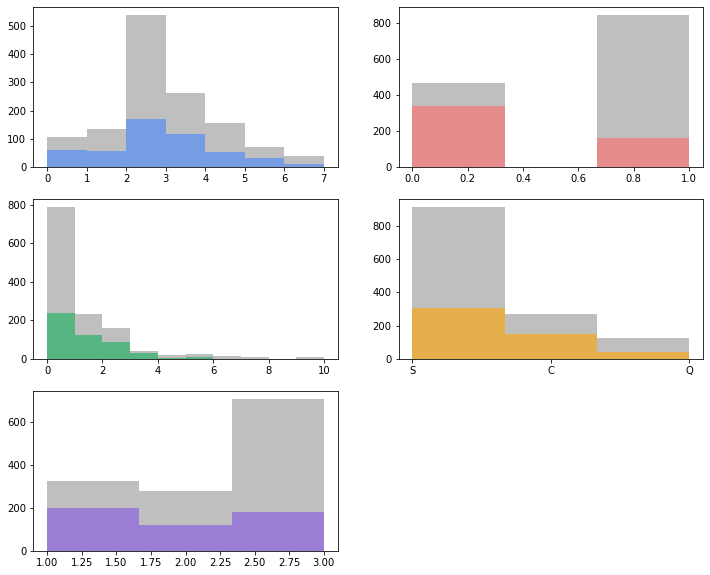

In [75]:
# 다른 그 어떤 변수보다도 구조보트에 탔는지의 유무가 생존 여부 판정에
# 지대한 영향을 끼친다는 걸... 우리는 알게 되었습니다...
# 너무 치트키 같아서 양심의 가책이 느껴지네요
# 앞에 했던 데이터 정제 작업 다 치우고 보트만 작업해도 높은 정확도가 나오지 않을까 싶습니다

a = plt.figure(figsize = (12,10))
a1 = a.add_subplot(3,2,1)
a2 = a.add_subplot(3,2,2)
a3 = a.add_subplot(3,2,3)
a4 = a.add_subplot(3,2,4)
a5 = a.add_subplot(3,2,5)

# 탑승자 연령범주 밀집도 - 전체는 회색, 생존자는 파란색
# 20대가 압도적으로 높고, 그 다음 30대
a1.hist(tt3b.age,bins=7,color='gray',alpha=0.5)
a1.hist(tt3b.age[tt3b.survived==1],bins=7,color='cornflowerblue',alpha=0.8)

# 성별 밀집도
# 전체 탑승객 성별 비율은 회색, 생존자는 분홍색
# 탑승객 중 여성은 대부분 생존. 생존자 비율도 여성이 남성의 2배.
a2.hist(tt3b.sex,bins=3,color='gray', alpha=0.5)
a2.hist(tt3b.sex[tt3b.survived==1],bins=3,color='lightcoral',alpha=0.8)

# 동반자 밀집도 - 회색이 전체, 초록색이 생존자
# 동반자 없는 사람이 압도적으로 높다보니 생존자 중에서도 동반자 없는 사람이 좀 더 생존율이 높게 나옴
# 현실적으로 생각했을 때 동반자를 챙기면서 탈출하는 것보다
# 혈혈단신으로 탈출하는 게 더 생존율이 높을 것 같긴 함...
a3.hist(tt3b.family,bins=10,color='gray', alpha=0.5)
a3.hist(tt3b.family[tt3b.survived==1],bins=6,color='mediumseagreen',alpha=0.8)

# 탑승구역 별 밀집도 - 회색이 전체, 노란색이 생존자
# 이것도 마찬가지. S구역 탑승객의 생존율이 높은 건 그냥 거기서 많이 탔기 때문임
# 절대량이 많으니 생존율도 높아지는 거지... 동반자와 마찬가지로
a4.hist(save.embarked,bins=3,color='gray', alpha=0.5)
a4.hist(save.embarked[save.survived==1],bins=3,color='orange',alpha=0.6)

# 클래스 별 밀집도 - 회색이 전체, 보라색이 생존자
# 3등석에 타면... 생존율이 절반도 채 안 된다...
a5.hist(tt3b.pclass,bins=3,color='gray', alpha=0.5)
a5.hist(tt3b.pclass[tt3b.survived==1],bins=3,color='mediumpurple',alpha=0.8)

# 최종 정리

1. 생존율에 크게 작용한 요소는 성별.<br>
    실제로 타이타닉 호에서 여성을 먼저 구조보트에 태웠기에 이런 결과가 나왔다.<br>
<br>
2. 그 다음 생존율에 크게 작용한 것은 클래스.<br>
    정확히 말하면, 3등석에 탄 사람들의 생존율이 다른 석에 탑승한 사람들보다<br>
    극적으로 떨어지는 것을 알 수 있다.<br>
    1, 2등석 승객의 생존율은 비교적 비슷하게 가지만 3등석의 경우 생존자 비율이 1/4 정도임.<br>
    찾아봤는데, 3등석 객실은 배의 하단부에 위치해 있어서 그만큼 탈출하기 어려웠을 것이다.<br>
<br>
3. 동반자 여부, 탑승구역, 연령도 크게 작용할 줄 알았으나<br>
    생각보다 지배력이 크지 않은 듯.<br>
    절대량이 많을수록 생존자도 많이 나오는 건 어찌 보면 당연한 결과이니...<br>
    오히려 비율로 보자면 다른 항목보다 생존율 자체는 떨어진다고도 볼 수 있겠다.<br>
<br>
<br>

### 아쉬웠던 점

1. 솔직히 구명보트 탑승 여부로 생존율 파악하는 건 너무 노골적인 방안이라...<br>
    최초로 작업했던 연령, 클래스, 탑승구역, 동반자 여부 데이터로<br>
    예측 확률을 높일 수 있는 방안이 있다면 알고 싶음.<br>
    (내 힘으로 해보고 싶어서 아직 구글링 해보진 않았다)<br>
<br>
2. 연령 결측치를 내 나름 기준으로 채우긴 했는데<br>
    이게 실제 데이터와 얼마나 비슷할지 궁금하지만 영영 알 수 없겠지 ㅠㅠ<br>
    특히 여성 쪽에서 호칭이 연령 파악에 그다지 도움이 되지 않아 아쉬움이 크다.<br>
    

In [38]:
# 이건 선생님이 만든 것

#df = pd.read_pickle('./visualization/dataset/tdf.pkl')
#df.head()